# <code style="color:Crimson">1. EXPLORATORY DATA ANALYSIS</code>

## This is an example of Linear Regression 

### Project Scope: Real Estate Tycoon

Our client is a large real estate investment trust (REIT). They invest in houses, appartments and condos within a small county in New York state. As a part of their business, they try to predict the fair trasaction price of a property before it's sold. They do this to caliberate their internal pricing models and keep a post on the market. 


**Current solution:** The REIT currently uses a third party appraisal service. Appraisers are professionals who visit a property and estimate a fair price using their expertise or their own sets of metrics and checklists.Unfortunately, the skill levels of appraisers can vary greatly. The REITS compared the appraiser prices to actual transaction prices and they found that the estimates given by the inexperiences appraisers were off by $70,000 on average.

**Our role:**<br>
The REIT has hired us to find a data driven approach to valueing properties. They currently have an untapped dataset for transaction prices for previous properties on the market and our goal is to build a real estate pricing model using that dataset.

**Goal:**<br>
Build a model to predict transaction prices with an average error of under $70,000.

### Specifics:

**Machine Learning task:** Regression model

**Target variable:** Transaction price

**Input variables:** Refer to data dictionary file - "Data Dictionary - Real Estate Tycoon"

**Success Criteria:** Mean Absolute Error (MAE) < $70,000

### This project will be carried out in 4 stages

**1. Exploratory Data Analysis:** Data understanding and generating insights


**2. Data Cleaning & Data Preparation:** Preparing data for Modelling


**3. Data Modelling:** Experimenting with classification algorithms


**4. Model Evaluation:** Verifying using performance metrics

## Importing the libraries

In [1]:
#import all the libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
from matplotlib import pyplot as plt
%matplotlib inline

#### Read the dataset

In [2]:
df = pd.read_csv('real_estate_data.csv')

## I. Basic Information

**A.** Let's begin by exploring the basics

* Display the shape of the dataset to check;

* How many observations do we have?

* How many features do we have?

In [3]:
#df.head()
df.shape

(1883, 26)

**B.** Display the datatypes of the features

* Which are the numeric features?

* Which are the categorical features?

In [4]:
df.dtypes

tx_price                int64
beds                    int64
baths                   int64
sqft                    int64
year_built              int64
lot_size                int64
property_type          object
exterior_walls         object
roof                   object
basement              float64
restaurants             int64
groceries               int64
nightlife               int64
cafes                   int64
shopping                int64
arts_entertainment      int64
beauty_spas             int64
active_life             int64
median_age            float64
married               float64
college_grad          float64
property_tax          float64
insurance             float64
median_school         float64
num_schools           float64
tx_year                 int64
dtype: object

At this point, we should doublecheck all the datatypes and compare it with the data dictionary that is provided just to verify the data types (i.e. numeric features that should be categorical or vice-versa)

As we can see, all of the columns are numeric, except for 3 categorical ones:<br>
<code style="color:steelblue">'exterior_walls'</code><br>
<code style="color:steelblue">'property_type'</code><br>
<code style="color:steelblue">'roof'</code><br>

**C.** Display the first 10 observations from the dataset. The purpose is to quickly eyeball the data. 

* Do the columns make sense?

* Do the values in those columns make sense?

* What types of classes are there for the categorical features?

In [5]:
#first 10 rows of data
df.head(10)

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,...,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,...,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,...,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,...,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,...,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,...,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002
5,265000,1,1,641,1947,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,...,60,52,28.0,15.0,86.0,168.0,58.0,8.0,3.0,2004
6,240000,1,1,642,1944,0,Single-Family,Brick,NaN,NaN,...,66,50,28.0,36.0,88.0,176.0,61.0,7.0,3.0,2011
7,388100,1,1,650,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,...,72,83,36.0,25.0,91.0,266.0,92.0,9.0,3.0,2005
8,240000,1,1,660,1983,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,...,32,41,36.0,49.0,77.0,188.0,65.0,6.0,3.0,2013
9,250000,1,1,664,1965,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,...,70,36,57.0,13.0,83.0,147.0,51.0,6.0,3.0,2007


## II. Distributions

### <font style="color:Blue">A. Plot Distributions of Numeric Features</font>
One of the most enlightening data exploration tasks is plotting the distributions of your features. For numerical features we are going to use a pandas histogram.

Things to look out for:<br>
1. Distributions that don't make sense (e.g a large spike in houses with 10 bedrooms)<br>
2. Potential outliers that don't make sense<br>
3. Sparse data<br>
4. Numeric features that should be categorical<br>
5. Features that should be binary<br>
6. Boundaries that don't make sense (e.g.percent above 100 or below 0)<br>

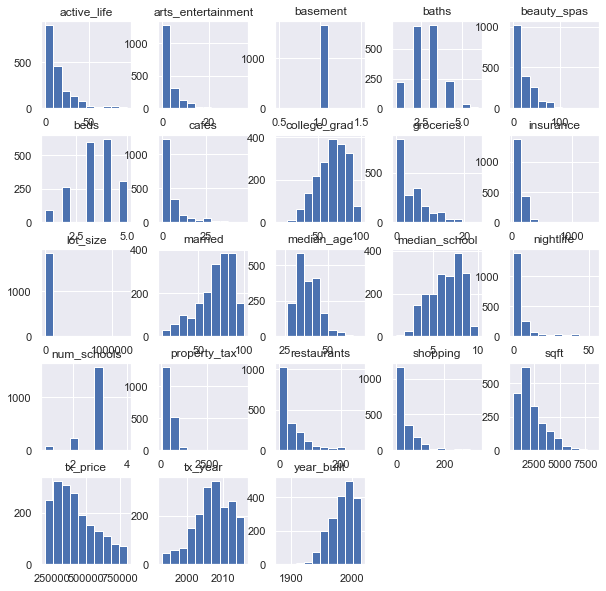

In [6]:
#plotting numerical features
df.hist(figsize=(10,10))
plt.show()

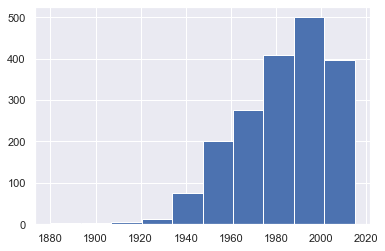

In [7]:
#plotting a single feature distribution
df.year_built.hist()
plt.show()

We see that the histogram bins are in large increments? This makes it harder to see the precise cutoff points.<br> 

* For example, it's unclear based on this plot alone what the exact maximum year_built value is in the dataset.<br>
* And since this dataset was pulled in 2016, we cannot have a house that was built in 2017, 2018, or 2019.<br>
* In other words, a house built after 2016 would indicate a measurement error.<br>

At the end of the day, it's hard to know if there's a measurement error from the plot above. While you can definitely tinker with the histogram more and try to arrive at a "perfect" chart, it's really unnecessary at this stage of your exploratory analysis. Especially since you have potentially dozens of features, it's impractical to try visualize each one perfectly.

**The solution is to display the formal summary statistics.**

### Display summary statistics of the numeric features

**Things to look out for:**

* Are any of the count values less than the total number of observations? What does this imply?

* Do the min values for each column make sense?

* Do the max values for each column make sense?

In [8]:
# Summarize numerical features
df.describe()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,...,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1.883000e+03,1657.0,1883.000000,1883.000000,1883.000000,...,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,422839.807754,3.420605,2.579926,2329.398832,1982.963887,1.339262e+04,1.0,40.210303,4.505045,5.074881,...,23.416888,15.835369,38.601168,69.091875,65.085502,466.777483,140.454063,6.502921,2.793415,2007.111524
std,151462.593276,1.068554,0.945576,1336.991858,20.295945,4.494930e+04,0.0,46.867012,4.491029,8.464668,...,25.776916,17.667717,6.634110,19.659767,16.953165,231.656645,72.929765,1.996109,0.505358,5.196898
min,200000.000000,1.000000,1.000000,500.000000,1880.000000,0.000000e+00,1.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,22.000000,11.000000,5.000000,88.000000,30.000000,1.000000,1.000000,1993.000000
25%,300000.000000,3.000000,2.000000,1345.000000,1970.000000,1.542000e+03,1.0,7.000000,1.000000,0.000000,...,4.000000,4.000000,33.000000,58.000000,54.000000,320.000000,94.000000,5.000000,3.000000,2004.000000
50%,392000.000000,3.000000,3.000000,1907.000000,1986.000000,6.098000e+03,1.0,23.000000,3.000000,2.000000,...,15.000000,10.000000,38.000000,73.000000,66.000000,426.000000,125.000000,7.000000,3.000000,2007.000000
75%,525000.000000,4.000000,3.000000,3005.000000,2000.000000,1.176100e+04,1.0,58.000000,7.000000,6.000000,...,35.000000,21.000000,43.000000,84.000000,78.000000,569.000000,169.000000,8.000000,3.000000,2011.000000
max,800000.000000,5.000000,6.000000,8450.000000,2015.000000,1.220551e+06,1.0,266.000000,24.000000,54.000000,...,177.000000,94.000000,69.000000,100.000000,100.000000,4508.000000,1374.000000,10.000000,4.000000,2016.000000


Now if we look at the <code style="color:steelblue">'year_built'</code> column, we can see that its max value is 2015.

**We can also find other useful information such as mean, std (standard deviation), and the 25%, 50%, 75% quartiles.**<br>
* For example, we it looks like the <code style="color:steelblue">'basement'</code><br> feature only has the value 1.0
* We know this because its standard deviation is 0.0, while its min and max are both 1.0
* Be careful... <code style="color:steelblue">'basement'</code> also has missing values! You can tell because its count is only 1657 (out of a total of 1883 observations).
Let's make a note to fix the <code style="color:steelblue">'basement'</code>feature later

### <font style="color:Blue">B. Plot Distributions of Categorical Features</font>

By default, <code style="color:steelblue">.describe()</code>function only summarizes numerical features. However, we can tell it to summarize categorical features using the <code style="color:steelblue">include=</code> argument.

**Things to look out for:**

For each categorical feature;

* How many unique classes does it have?

* What is the most frequent class?

* How many observations belong to the most frequent class?

* Does it have any missing values?

In [9]:
# Summarize categorical features
df.describe(include=['object'])

,property_type,exterior_walls,roof
count,1883,1660,1529
unique,2,16,16
top,Single-Family,Brick,Composition Shingle
freq,1080,687,1179


For example, look at the <code style="color:steelblue">'exterior_walls'</code> column in the summary statistics above. 

Out of **1660** observations with values for exterior wall...<br>
* there are **16** unique classes<br>
* and the most frequent (i.e. commonly occurring) one is **'Brick'**<br>
* with **687** total occurrences.<br>

[]

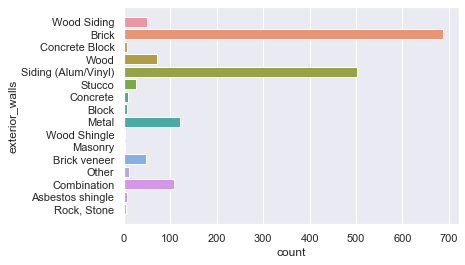

In [10]:
#Let's visualize this information

sns.countplot(y='exterior_walls',data=df)
plt.plot()

As we can see based on the plot.<br>
* There are 16 unique classes from **'Wood Siding'** down to **'Rock, Stone'**.
* And **'Brick'** is the most frequently occurring class. <br>

**However, we're also able to see something else that the summary statistics could not tell us: sparse classes.**

There are many classes that only have a very small number of observations, including:<br>
* 'Concrete Block'
* 'Concrete'
* 'Block'
* 'Wood Shingle' etc...<br>

These are called **sparse classes.** Sparse classes tend to be problematic when we get to building our models.<br>
* Best case: they don't influence the model much.
* Worst case: they cause the model to overfit.

Let's make a note to **combine** or **reassign** some of these classes later. We will handle this during data cleaning and feature engineering.

#### Let's write a for loop (that can handle any number of categorical features) to plot bar plots of each of the categorical features.

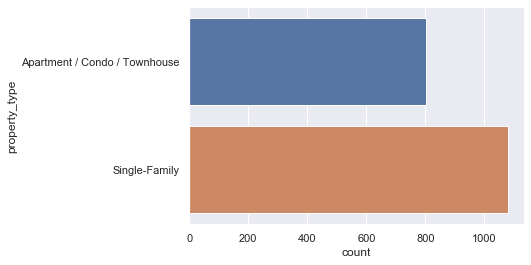

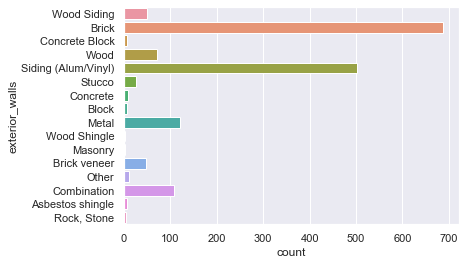

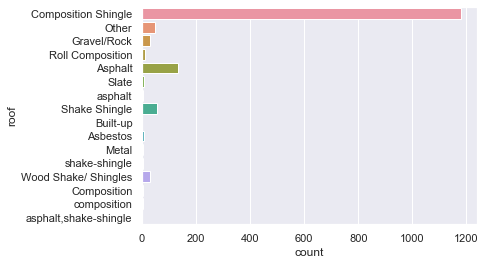

In [11]:
# Plot bar plot for each categorical feature
for feature in df.dtypes[df.dtypes == 'object'].index:
    sns.countplot(y=feature, data=df)
    plt.show()

## III. Segmentations

**First let's try segmenting the target feature by key categorical features.**<br>

* For example, we can segment <code style="color:steelblue">'tx_price'</code> by '<code style="color:steelblue">'property_type'</code> and plot the resulting distributions using Seaborn's <code style="color:steelblue">boxplot()</code> function.

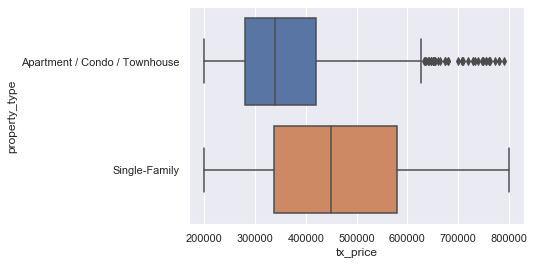

In [12]:
# Segment tx_price by property_type and plot distributions
sns.boxplot(y='property_type', x='tx_price', data=df)

It looks like single family homes are more expensive than apartments.

**Let's compare the two property types across other features.**

* We could plot more bar plots, but we can also use Pandas's <code style="color:steelblue">.groupby()</code> function.
* <code style="color:steelblue">.groupby()</code> can segment by a categorical feature and then calculate a metric (such as mean, median, max, etc.) across numeric features.<br>

For example, let's segment by 'property_type' and calculate the average value of each feature within each class:

In [13]:
# Segment by property_type and display the means within each class
df.groupby('property_type').mean()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,...,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
property_type,,,,,,,,,,,,,,,,,,,,,
Apartment / Condo / Townhouse,366614.034869,2.601494,2.200498,1513.727273,1988.936488,3944.239103,1.0,58.418431,5.919054,7.855542,...,32.087173,22.410959,37.199253,57.534247,66.372354,346.261519,105.652553,6.382316,2.831880,2007.941469
Single-Family,464644.711111,4.029630,2.862037,2935.865741,1978.523148,20417.666667,1.0,26.672222,3.453704,3.007407,...,16.970370,10.946296,39.643519,77.685185,64.128704,556.383333,166.329630,6.592593,2.764815,2006.494444


In [14]:
# Segment by property_type and display the mean and standard deviations within each class
df.groupby('property_type').agg(['mean','std'])

tx_price                     beds  \
                                        mean            std      mean   
property_type                                                           
Apartment / Condo / Townhouse  366614.034869  121784.490486  2.601494   
Single-Family                  464644.711111  157758.739013  4.029630   

                                            baths                   sqft  \
                                    std      mean       std         mean   
property_type                                                              
Apartment / Condo / Townhouse  0.810220  2.200498  0.815009  1513.727273   
Single-Family                  0.795639  2.862037  0.937551  2935.865741   

                                             year_built             ...  \
                                       std         mean        std  ...   
property_type                                                       ...   
Apartment / Condo / Townhouse   556.286650  1988.936488  15.513640  ...   
Single-Family                  1422.871169  1978.523148  22.210582  ...   

                              property_tax               insurance             \
                                      mean         std        mean        std   
property_type                                                                   
Apartment / Condo / Townhouse   346.261519  142.292282  105.652553  47.118015   
Single-Family                   556.383333  244.351559  166.329630  77.816022   

                              median_school           num_schools            \
                                       mean       std        mean       std   
property_type                                                                 
Apartment / Condo / Townhouse      6.382316  1.941998    2.831880  0.455370   
Single-Family                      6.592593  2.031663    2.764815  0.537959   

                                   tx_year            
                                      mean       std  
property_type                                         
Apartment / Condo / Townhouse  2007.941469  4.099487  
Single-Family                  2006.494444  5.807059  

[2 rows x 46 columns]

## IV. Correlations

 Let's take a look at the relationships amongst the **numeric features**
 
 
**Correlation** is a value between -1 and 1 that represents how closely values for two separate features move in unison.
* Positive correlation means that as one feature increases, the other increases.

* Negative correlation means that as one feature increases, the other decreases.

* Correlations near -1 or 1 indicate a strong relationship.

* Those closer to 0 indicate a weak relationship.

* 0 indicates no relationship.

In [15]:
# Calculate correlations between numeric features and create a dataframe.
correlations = df.corr()

In [16]:
correlations

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,...,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
tx_price,1.000000,0.384046,0.389375,0.469573,0.033138,0.130558,NaN,-0.038027,-0.094314,0.009361,...,-0.054349,-0.001165,0.126335,0.200494,0.268577,0.535148,0.532947,0.175762,-0.014380,0.108782
beds,0.384046,1.000000,0.644572,0.691039,-0.011844,0.164399,NaN,-0.495834,-0.421412,-0.440844,...,-0.419832,-0.486957,0.133711,0.643240,-0.082354,0.547643,0.485776,0.137309,-0.124359,-0.174081
baths,0.389375,0.644572,1.000000,0.682060,0.206141,0.132976,NaN,-0.350210,-0.340024,-0.306686,...,-0.282008,-0.329736,0.095844,0.442225,0.016097,0.525776,0.475430,0.163365,-0.088299,-0.132110
sqft,0.469573,0.691039,0.682060,1.000000,0.254589,0.246016,NaN,-0.353759,-0.371167,-0.281540,...,-0.310465,-0.332663,0.109811,0.480167,0.065343,0.660264,0.594049,0.220669,-0.102032,-0.236190
year_built,0.033138,-0.011844,0.206141,0.254589,1.000000,0.000068,NaN,-0.106948,-0.222443,-0.080006,...,-0.163670,-0.134919,-0.237152,0.038208,-0.014204,-0.046504,-0.109521,0.155835,-0.188106,-0.043301
lot_size,0.130558,0.164399,0.132976,0.246016,0.000068,1.000000,NaN,-0.113887,-0.118574,-0.072224,...,-0.121075,-0.092668,0.099140,0.122028,-0.030725,0.165800,0.146579,0.096551,-0.031535,-0.048207
basement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
restaurants,-0.038027,-0.495834,-0.350210,-0.353759,-0.106948,-0.113887,NaN,1.000000,0.701462,0.926675,...,0.867829,0.881799,-0.063816,-0.615584,0.214260,-0.100821,-0.019925,-0.068425,0.251171,0.044739
groceries,-0.094314,-0.421412,-0.340024,-0.371167,-0.222443,-0.118574,NaN,0.701462,1.000000,0.565003,...,0.626850,0.574532,-0.022377,-0.508793,-0.006025,-0.159506,-0.093974,-0.354553,0.272856,0.115674
nightlife,0.009361,-0.440844,-0.306686,-0.281540,-0.080006,-0.072224,NaN,0.926675,0.565003,1.000000,...,0.777461,0.858836,-0.028611,-0.568811,0.253717,-0.054386,0.024551,-0.036948,0.196399,0.027495


**This is difficult to read and understand, so let's visualize this.**

Note: The correlations for <code style="color:steelblue">'basement'</code>  all show as **NaN.** This is because right now that feature doesn't vary at all (its standard deviation is 0).

To visualize the correlation grid and make it easier to digest use Seaborn's <code style="color:steelblue">sns.heatmap()</code>function.<br>

* The **cmap=** argument controls the color palette used in the heatmap. We set it to the value of **RdBu_r**, which is a diverging red-blue color map. So positive correlation values will be red and negative correlation values will be blue.


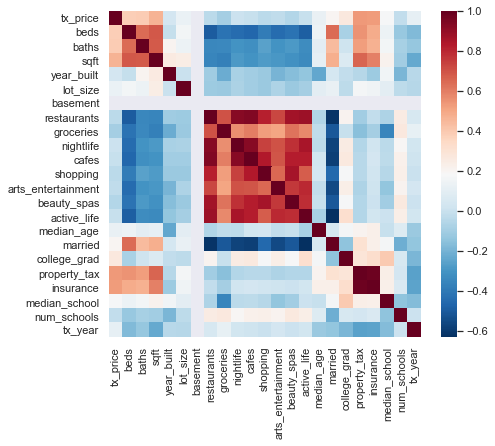

In [17]:
# Increase the figsize to 7 x 6
plt.figure(figsize=(7,6))

# Plot heatmap of correlations
sns.heatmap(correlations, cmap='RdBu_r')

* Dark red is (strong positive correlation) and dark blue is (strong negative correlation).

* In this case, it doesn't look like many features are strongly correlated with the target variable. There is a weak positive correlation between <code style="color:steelblue">'tx_price'</code> and <code style="color:steelblue">'property_tax'</code>.

* Again, we are primarily looking to gain a better intuitive understanding of the data, which will help us throughout the rest of the project.


To display the correlation values in each cell, The **annot=** argument controls whether to annotate each cell with its value. By default, it's False.

To make the chart cleaner, multiply the correlations DataFrame by 100 before passing it to the heatmap function.
Pass in the argument fmt='.0f' to format the annotations to a whole number.

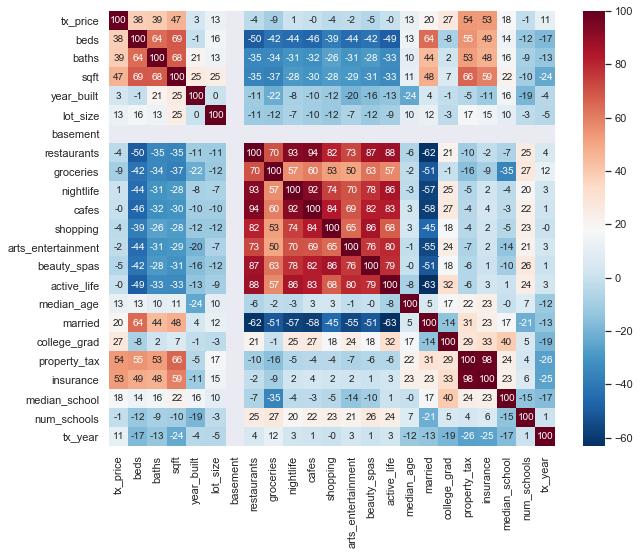

In [18]:
# Plot heatmap of annotated correlations
# Make the figsize 10 x 8
plt.figure(figsize=(10,8))

cr=correlations*100
sns.heatmap(cr,cmap='RdBu_r',annot=True, fmt='.0f',)

 ## Masking

So one thing to notice about the correlation matrix is that the upper triangle is an exact mirror of the lower triangle. Because the top triangle of the correlation matrix is redundant with the lower triangle, we can choose to hide it if we want to reduce the amount of visual clutter

In [19]:
# Generate a mask for the upper triangle
mask = np.triu(cr)
#triu - upper triangle, keeps upper triangle and turns all values in lower triangle to 0. Similarly df.tril(cr) will do opposite. tril is lower triangle

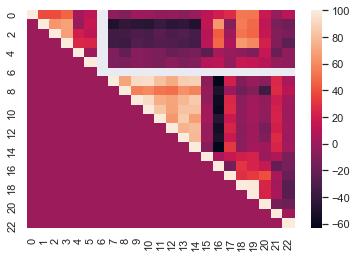

In [20]:
sns.heatmap( mask )
plt.show()

After creating a triangular mask like the one above, we can pass it into the <code style="color:steelblue">sns.heatmap()</code> function to hide certain cells (i.e. all of the True values in the mask).

#### Plot the correlation heatmap again, this time using that mask.
* **Tip:** <code style="color:steelblue">sns.heatmap()</code> has a <code style="color:steelblue">mask=</code> argument.

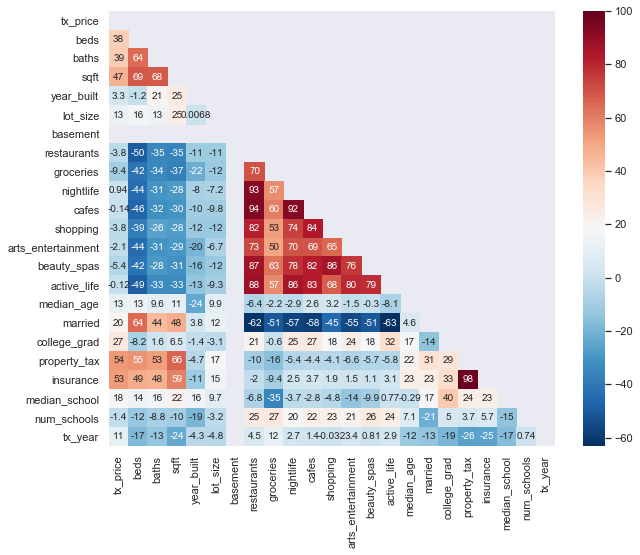

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(cr,cmap='RdBu_r',annot=True,mask=mask)